In [35]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split


In [36]:
df = pd.read_csv("../data/mi_matched_precinct_use_this.csv")
df.columns


Index(['VTD_ID', 'total_pop', 'pop_density', 'prop_white', 'prop_Black',
       'prop_Hispanic', 'prop_AIA', 'prop_Asian', 'prop_married',
       'prop_nonfamily', 'prop_family_nonmarried', 'prop_hs_diploma',
       'prop_some_college', 'prop_bachelors', 'prop_higher', 'prop_under_hs',
       'prop_under_30k', 'prop_30_to_50k', 'prop_50_to_100k',
       'prop_more_than_100k', 'D_pct_vote', 'Weighted_ideology'],
      dtype='object')

In [37]:
x = df.drop(['prop_white', 'prop_higher', 'D_pct_vote', 'Weighted_ideology'], axis=1)
y = df['D_pct_vote']
x.columns


Index(['VTD_ID', 'total_pop', 'pop_density', 'prop_Black', 'prop_Hispanic',
       'prop_AIA', 'prop_Asian', 'prop_married', 'prop_nonfamily',
       'prop_family_nonmarried', 'prop_hs_diploma', 'prop_some_college',
       'prop_bachelors', 'prop_under_hs', 'prop_under_30k', 'prop_30_to_50k',
       'prop_50_to_100k', 'prop_more_than_100k'],
      dtype='object')

In [38]:
x.to_numpy()
y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

match_vtd = X_test['VTD_ID'].to_numpy()
X_test.drop('VTD_ID', axis=1)
X_train.drop('VTD_ID', axis=1)

,total_pop,pop_density,prop_Black,prop_Hispanic,prop_AIA,prop_Asian,prop_married,prop_nonfamily,prop_family_nonmarried,prop_hs_diploma,prop_some_college,prop_bachelors,prop_under_hs,prop_under_30k,prop_30_to_50k,prop_50_to_100k,prop_more_than_100k
823,1085.995294,0.002588,7.508177e-03,0.073884,0.003601,2.160984e-01,0.739701,0.156780,0.103520,0.000000e+00,0.082186,0.280514,0.250104,0.060924,0.099899,0.249053,0.590124
479,805.589803,0.000013,2.409619e-02,0.032062,0.002144,3.142390e-03,0.576385,0.369381,0.054234,0.000000e+00,0.192892,0.326813,0.231994,0.163563,0.117959,0.357622,0.360856
527,3772.848616,0.000300,9.158439e-03,0.050362,0.014134,6.783282e-03,0.623474,0.219752,0.156774,0.000000e+00,0.131523,0.257920,0.484533,0.159133,0.176735,0.310820,0.353312
633,2157.990157,0.002393,3.230000e-08,0.056534,0.012512,5.080000e-08,0.508307,0.277962,0.213731,0.000000e+00,0.053103,0.229047,0.665387,0.130675,0.339977,0.253599,0.275748
388,745.255220,0.000010,1.179130e-04,0.012718,0.008757,5.602055e-03,0.487456,0.462643,0.049901,0.000000e+00,0.115276,0.109935,0.692549,0.378326,0.238168,0.294827,0.088680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1605.538229,0.000039,0.000000e+00,0.025110,0.003067,7.743880e-03,0.543440,0.359332,0.097229,0.000000e+00,0.170270,0.150283,0.622837,0.287941,0.160311,0.356839,0.194909
330,194.367033,0.000321,4.534354e-03,0.017936,0.020889,0.000000e+00,0.508504,0.327340,0.164156,0.000000e+00,0.146390,0.063955,0.753549,0.320973,0.238804,0.328780,0.111442
466,1424.424412,0.000040,1.339143e-02,0.006640,0.011051,5.573141e-03,0.535229,0.345808,0.118963,0.000000e+00,0.176706,0.060665,0.729848,0.307023,0.303399,0.301118,0.088460
121,1607.517536,0.000655,1.051735e-02,0.022820,0.024166,6.589097e-03,0.470266,0.384295,0.145440,0.000000e+00,0.172316,0.126420,0.664557,0.259067,0.277313,0.344426,0.119195


In [39]:
lr = [.05, .1,.15,.2,.25,.3,.35]
accuracies = {}
for l in lr:
    reg = lgb.LGBMRegressor(learning_rate=l)
    reg.fit(X_train, y_train)
    r2 = reg.score(X_test, y_test)
    accuracies[l] = r2
print("Most accurate learning rate is:", max(accuracies, key=accuracies.get))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

R-squared for percent of democratic votes is: 0.7466516041406176


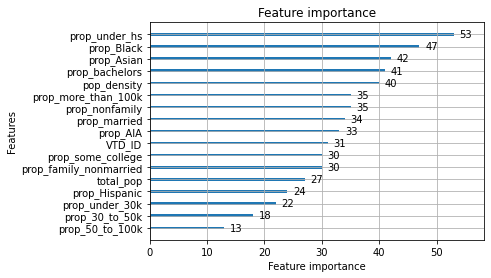

In [ ]:
reg = lgb.LGBMRegressor(learning_rate=0.1)
reg.fit(X_train, y_train)
ydp_pred = reg.predict(X_test).transpose()
print("R-squared for percent of democratic votes is:", reg.score(X_test, y_test))
lgb.plot_importance(reg)

matched_ydp = np.column_stack((match_vtd, ydp_pred))



In [ ]:
y = df['Weighted_ideology']
x.to_numpy()
y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
lr = [.05, .1,.15,.2,.25,.3,.35]
accuracies = {}
for l in lr:
    reg = lgb.LGBMRegressor(learning_rate=l)
    reg.fit(X_train, y_train)
    r2 = reg.score(X_test, y_test)
    accuracies[l] = r2
print("Most accurate learning rate is:", max(accuracies, key=accuracies.get))

Most accurate learning rate is: 0.05


R-squared for weighted ideology is: 0.49922160420495654


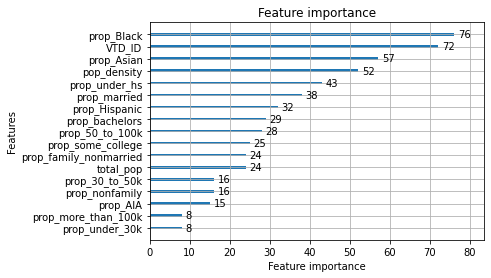

In [ ]:
reg = lgb.LGBMRegressor(learning_rate=0.05)
reg.fit(X_train, y_train)
yw_pred = reg.predict(X_test)
print("R-squared for weighted ideology is:",reg.score(X_test, y_test))
lgb.plot_importance(reg)

matched_yw = np.column_stack((match_vtd, yw_pred))

In [ ]:
df_ydp = pd.DataFrame(matched_ydp)
df_yw = pd.DataFrame(matched_yw)

print(df_ydp)


               0         1
0   2.612513e+10  0.532980
1   2.612513e+10  0.622867
2   2.612513e+10  0.529777
3   2.612513e+10  0.450677
4   2.612513e+10  0.527750
..           ...       ...
78  2.612513e+10  0.610634
79  2.612500e+10  0.466898
80  2.612513e+10  0.526242
81  2.612513e+10  0.368944
82  2.616316e+10  0.578177

[83 rows x 2 columns]
